# アイスクリーム統計学 with Python 第2章

第７回講義（2017年10月17日講義、10月20日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>の内容をプログラミング言語 Python に合わせて書き直したものです。

<h1 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec0.html" target="_blank">第２章 相関係数</a></h1>

<P class="photo"><img src="image/icecream.jpg" width="172" height="179"></P>
<P>アイ子ちゃんのおかげで、「21アイスクリーム」は無事開店することができました。開店時のお客の数の予測がうまくいったからです。</P>
<P>さて、新しいアルバイトが入ってきました。</P>
<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P class=speech>「初めまして。今日からバイトさせてもらう三ヶ島です。よろしくね」</P>
<P class=speech>───よろしくお願いします。アイ子といいます。</P>
<P class=speech>「アイ子ちゃん、大学生？」</P>
<P class=speech>───そうです。藁田大学。</P>
<P class=speech>「ありゃ、同じ大学じゃないか。学部は？」</P>
<P class=speech>───人間科学部です。</P>
<P class=speech>「ぼくは、大学院にいるんだよ。奇遇だね」</P>
<P class=speech>───そうですか～。先輩ですね。</P>

<P>さて、一見頼りなさそうな三ヶ島先輩ですが、話はどうなっていくのでしょうか。</P>


<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec1.html" target="_blank">2.1　相関の強さ</a></h2>

<P class="photo"><img src="image/tencho-komaru.jpg" width="126" height="139"></P>
<P class="speech">「アイ子ちゃん、これなんだけどね」</P>
<P>店長がなにやら困っているようです。</P>
<P class="speech">「これを見てほしいんだ。これは９月のうちの店の客数と気温のデータなんだ」</P>
<P class="speech">───はい、散布図ですね。</P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.1</h4>

[店舗Aと店舗Bの８月の客数データ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt)をダウンロードし、下記の例のように散布図を描いてください。

__ヒント__：今度のデータは全部で４列。４列目は店舗AかBかを表す列なので、これを利用して場合分けをする必要があります。Aの０列目、１列目、２列目をそれぞれ col1a, col2a, col3a、Bの０列目、１列目、２列目をそれぞれ col2a, col2b, col2c という名のリストに格納してください。

In [13]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。

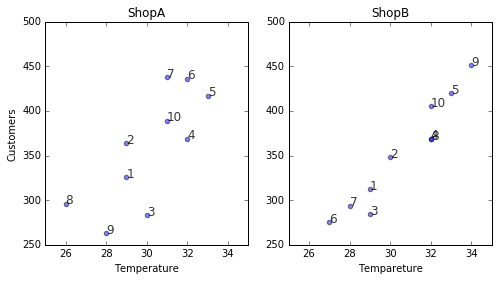

In [14]:
#２つのサブプロットを使って散布図を描く。
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(col2a, col3a, alpha=0.5)
plt.title("ShopA")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1a, col2a, col3a):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(col2b, col3b, alpha=0.5)
plt.title("ShopB")
plt.xlabel("Tempareture")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1b, col2b, col3b):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()

plt.show()

<P class="speech">「平日だけのデータにしてある。何か気がつかないかい？」</P>
<P class="speech">───右上がりなので、正の相関ですね。</P>

<P class="speech">「確かに正の相関なんだけど、B店の散布図と見比べてほしいんだ」</P>
<P class="speech">───どちらの散布図も右上がりの正の相関だけど、比べてみると、B店の方がシャープですね。うちの店の散布図は、何というか、ばらけている感じです。</P>
<P class="speech">「そうなんだよ。シャープということは、相関が強いということだろう。逆に、ばらけているというのは、相関が弱いということだよね。それを何とか数字にできないかな。そうするとはっきり言えるんだけど」</P>
<P class="speech">───数字ですか……。どうかな～</P>
<P class="photo"><img src="image/aiko-kangaekomu.jpg" width="150" height="137"></P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec2.html" target="_blank">2.2　相関係数</a></h2>

<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P class="speech">「店長、どうしました？　アイ子ちゃんも考え込んじゃって」</P>
<P class="speech">「ああ、三ヶ島くん。このグラフを見てよ。右上がりは同じだけどばらつきが違うでしょ。これを数字で表せないかな、と思っているんだけど」</P>
<P class="speech">「なるほど、相関の強さを数字で表すということですね。それなら相関係数というのがありますよ」</P>
<P class="photo"><img src="image/tencho-nattoku.jpg" width="128" height="140"></P>
<P class="speech">「なに～、相関係数だって？　そんなのがあるのか。それに、なんで君がそんなことを知っているのだ？」</P>
<P class="speech">「あはは、こう見えても大学院生ですからね」</P>
<P class="speech">───三ヶ島先輩、その相関係数というのを教えていただけますか？</P>
<P class="photo"><img src="image/aiko-ganbaru.jpg" width="181" height="133"></P>
<P class="speech">「データはもうファイルに入っているんだね。じゃあ、そこからスタートしよう」</P>


<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.2</h4>

[店舗Aと店舗Bの８月の客数データ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt)のデータを用い、店Aにおける最高気温と来客数の間の相関係数、店Bにおける最高気温と来客数の間の相関係数をそれぞれ求めてください。

In [15]:
# 平均値を求める関数
def average(list):

In [16]:
# 分散を求める関数
def variance(list):

In [17]:
# 標準偏差を求める関数
def standard_deviation(list):

In [18]:
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）
def covariance(list1, list2):

In [19]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):

In [ ]:
# 課題2.2を解いてください。

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec3.html" target="_blank">2.3　相関係数の意味(1)</a></h2>

<P class="photo"><img src="image/aiko-asekaki.jpg" width="194" height="150"></P>
<P class="speech">───ふう、やっと計算できた。計算がけっこう面倒ですね、三ヶ島先輩。</P>
<P class="speech">「でも、電卓で計算することを考えたら、プログラミング言語のありがたみがわかるでしょ」</P>
<P class="speech">───そうですね。式を間違いなく入れれば、あとは計算してくれるのだからラクですよね。</P>
<P class="photo"><img src="image/senpai-nozoku.jpg" width="135" height="126"></P>
<P class="speech">「どれどれ、相関係数はいくらになったかな」</P>
<P class="speech">───B店では、0.964でした。対して、うちの店では、0.760です。店長、これでどうですか？</P>
<P class="speech">「0.760だって？　なんだか妙に細かい数字だなあ。300とか1500とか、景気のいい数字にならないのか？　相関係数ってやつは」</P>
<P class="speech">───うーん、三ヶ島先輩、どうなんですか？</P>
<P class="speech">「いいえ、店長、相関係数はそういう数字にはならないんですよ。相関係数は常に、-1から+1の間の値を取るんです。だから、相関係数が3.5とかになったとしたら、必ず計算が間違っているはずです」</P>
<P class="speech">───なんで、相関係数は、-1から+1の間になるんですか？</P>
<P class="speech">「それを説明する前に、相関係数の意味を考えてみようよ」</P>

<h4 style="border-bottom: solid 1px black;">偏差積和</h4>

<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>まず平均からの偏差を計算したよね。偏差とは、平均からどれだけ大きいか、あるいは小さいかということだ。</p>
<p>これは、図のように、X軸での平均値より右側のデータではプラスになる。逆に、左側のデータではマイナスになる。</p>
<p class="photo"><img src="image/sokan1.jpg" width="534" height="386"></p>
<p>今度は、Y軸に注目すると、Y軸での平均値より上側のデータではプラスになる。逆に、下側のデータではマイナスになる。</p>
<p class="photo"><img src="image/sokan2.jpg" width="450" height="382"></p>
<p>上の２つをまとめると、Xの平均値とYの平均値によって、４つの領域に分けられるということだ。</p>
<p>右上の領域では、X, Yの平均からの偏差はプラスとプラスになる。右下の領域では、プラスとマイナス。左下では、マイナスとマイナス。左上では、マイナスとプラスだ。まとめるとこの図のようになる。</p>
<p class="photo"><img src="image/sokan3.jpg" width="448" height="423"></p>
<p>では、Xの偏差とYの偏差を掛け合わせると、どうなるか。これを偏差積と呼んでおこう。</p>
<p>右上の領域では、プラスとプラスだから、かけ算するとプラス。右下の領域では、プラスとマイナスだから、マイナス。左下では、マイナスとマイナスだから、かけ算するとプラスになるね。左上では、マイナスとプラスだから、かけてマイナス。まとめるとこの図のようになるわけだ。</p>
<p class="photo"><img src="image/sokan4.jpg" width="459" height="428"></p>
<p>つまり、右上と左下の領域ではプラス。それ以外の領域ではマイナス、ということになる。</p>
<p>したがって、右上と左下にデータが集まると、偏差積の和はプラスになる。こんな感じだ。</p>
<p class="photo"><img src="image/sokan5.jpg" width="238" height="267"></p>
<p>逆に、右下と左上にデータが集まると、偏差積の和はマイナスになる。こんな感じ。</p>
<p class="photo"><img src="image/sokan6.jpg" width="234" height="264"></p>
<p>では、４つの領域にほぼ均等にデータが散らばった場合はどうなるか。これは、プラスとマイナスが打ち消し合って、相関ゼロになる。こんな感じだ。</p>
<p class="photo"><img src="image/sokan7.jpg" width="238" height="266"></p>
<p>まとめると、４つの領域にどのようにデータが散らばるかによって、偏差積和がプラス、マイナス、あるいはゼロになるかが決まるというわけだ。だから、右上がりの散布図では正の相関、右下がりの散布図では負の相関、ばらばらの散布図では相関ゼロとなるんだ。</p>



<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec4.html" target="_blank">2.4　相関係数の意味(2)</a></h2>

<P class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></P>
<P class="speech">───三ヶ島先輩、散布図の形によって偏差積和がプラスになったりマイナスになったりすることはわかりました。</P>
<P class="speech">───でも、計算では、偏差積和の平均を取った後で、さらにそれをXとYの標準偏差で割っていますよね。</P>
<P class="speech">「そうだ。もう少しだけ説明を続けるね」</P>

<h4 style="border-bottom: solid 1px black;">偏差積和を平均して標準偏差で割るわけ</h4>

<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>まず、偏差積和を平均するということだけど、これは、データの個数の影響を取り除いているということ。偏差積和だけだと、データの数が大きくなるとそれにつれて値が大きくなってしまう（負の相関の時は小さくなってしまう）。したがって、偏差積和をデータ個数で割るわけだ。</p>
<p>次に、Xの標準偏差とYの標準偏差で割るということだけど、これは、Xについても、Yについても、標準偏差を１に揃えるということになるんだ。</p>
<p>イメージで描くと、このようになるかな。</p>
<p class="photo"><img src="image/sokan8.jpg" width="836" height="285"></p>
<p class="photo"><img src="image/aiko-hirameku.jpg" width="185" height="135"></p>
<p class="speech">───この図を見てみると、先に、すべてのデータを平均0、標準偏差1に揃えておいてから、掛け合わせてもいいような気がしますね。三ヶ島先輩。</p>
<p class="speech">「そうなんだよ。それでも相関係数が計算できるんだ。同じ事なんだよ。そして、この結果として、相関係数が-1から+1の間になるというわけなんだ」</p>
<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>相関係数が1になるケースは、このように、完全に一直線で右上がりになるときなんだ。</p>
<p class="photo"><img src="image/sokan9.jpg" width="263" height="274"></p>
<p>逆に、相関係数が-1になるケースは、このように、完全に一直線で右下がりになるときなんだ。</p>
<p class="photo"><img src="image/sokan10.jpg" width="261" height="275"></p>
<p class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></p>
<p class="speech">───三ヶ島先輩、直線の傾きは関係ありますか？</p>
<p class="speech">「いや、関係ないんだ。傾きに関係なく、右上がりなら相関係数は1、右下がりなら相関係数は-1になる。これは標準偏差を1にすることで調整されているからだ。ただし、完全に90度（つまり垂直）や180度（つまり水平）の直線の場合は、相関係数はゼロになるよ」</p>



<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap2/sec5.html" target="_blank">2.5　（応用編）相関の強さ</a></h2>

<P class="photo"><img src="image/tencho-muzukashii.jpg" width="127" height="138"></P>
<P class="speech">「なるほど、そんなわけで、相関係数は、-1から1の間に収まるのだね。でも……」</P>
<P class="speech">───でも…　何ですか、店長。</P>
<P class="speech">「0.2よりは0.8の方が、相関が強いというのはわかるけど、どれくらいの数値なら強いとか弱いとかいえるのだろうね？」</P>
<P class="speech">───そういえば、そうですね。</P>
<P class="speech">「たとえば、この前使った、駅からの距離と平均客数のデータだと、どれくらいの相関係数になるのだろう？　そして、それはどれぐらい強いんだろう？」</P>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)

<P class="speech">───じゃあ、まず、このデータを使って相関係数を求めてみよう。コーン、手伝って！</P>
<P class="photo"><img src="image/corn.jpg" width="120" height="91"></P>


<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.5</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)を用い、駅からの距離(m)と平均客数の間の相関係数を求めてください。

In [ ]:
# 課題2.5

<h4 style="border-bottom: solid 1px black;">相関の強さ</h4>
<p class="photo"><img src="image/aiko-hirameku.jpg" width="185" height="135"></p>
<P class="speech">───約マイナス0.98。最小で、マイナス1ですから、非常に強い負の相関ですね。三ヶ島先輩。</P>
<P class="speech">「そう、強い負の相関だね。相関係数をコトバで形容するときは、慣例で次のような言い回しが使われているよ」</P>
<P class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></P>
<table width="40%" border="1" align="center" cellpadding="0" cellspacing="0">
  <tr bgcolor="#FFFF66"> 
    <td width="43%"> 
      <div align="center">±0.7～±1</div></td>
    <td width="57%"> 
      <div align="center">強い相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFF99"> 
    <td> 
      <div align="center">±0.4～±0.7</div></td>
    <td> 
      <div align="center">中程度の相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFFCC"> 
    <td> 
      <div align="center">±0.2～±0.4</div></td>
    <td> 
      <div align="center">弱い相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFFFF"> 
    <td> 
      <div align="center">±0～±0.2</div></td>
    <td> 
      <div align="center">ほとんど相関がない</div></td>
  </tr>
</table>



<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第２章 課題</h2>

__課題2.1__、__課題2.2__、および__課題2.5__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：10月20日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第２章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [ ]:
# アイスクリーム統計学 第２章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics03.ipynb">第３章：無相関検定</a> に進んでください。</h2>
（2017年10月20日講義、10月24日課題提出締切）